In [1]:
import pandas as pd
from cluster_calc import *

In [3]:
address = '../data/data_all.pkl'
df = pd.read_pickle(address)
df=df.drop(df[df['Defect Number']<3].index)

In [4]:
def to_feature(atom_obj):
    return circle_radius(find_surface_atom_pos(atom_obj))
df['cluster_radius']=list(zip(*df['Object'].apply(to_feature)))[0]
df['cluster_radius_std']=list(zip(*df['Object'].apply(to_feature)))[1]

(array([  14.,   24.,   80.,  220.,  518., 1283., 2129., 1886.,  675.,
          75.]),
 array([1.83466155, 2.21220507, 2.58974859, 2.96729211, 3.34483563,
        3.72237915, 4.09992267, 4.47746619, 4.85500971, 5.23255323,
        5.61009675]),
 <BarContainer object of 10 artists>)

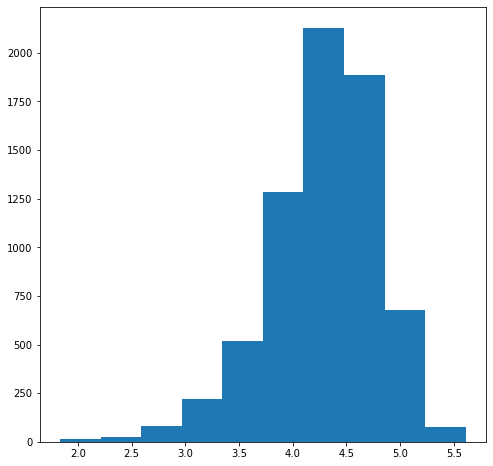

In [14]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8,8)
plt.hist(df['cluster_radius'])

(array([  37.,   97.,  263.,  725., 1419., 1857., 1575.,  734.,  171.,
          26.]),
 array([ 3.365983  ,  6.17670325,  8.98742351, 11.79814376, 14.60886401,
        17.41958426, 20.23030452, 23.04102477, 25.85174502, 28.66246527,
        31.47318553]),
 <BarContainer object of 10 artists>)

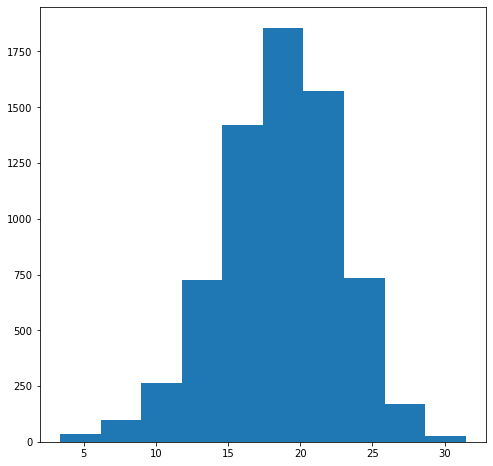

In [15]:
plt.hist(df['cluster_radius_std'])

In [16]:
df.columns

Index(['Config Number', 'Defect Number', 'Defect Type', 'Object',
       'Surface Energy', 'cluster_radius', 'cluster_radius_std'],
      dtype='object')

In [17]:
data=df[['Defect Number', 'Defect Type',
       'Surface Energy', 'cluster_radius', 'cluster_radius_std']]
data['Defect Type']=pd.factorize(data['Defect Type'])[0]
Y=data['Surface Energy']
X=data.loc[:, data.columns != 'Surface Energy']

/var/folders/j5/vqcpn48s0jq47hcht8gnqngc0000gn/T/ipykernel_7953/1143909263.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Defect Type']=pd.factorize(data['Defect Type'])[0]


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=4)

In [19]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

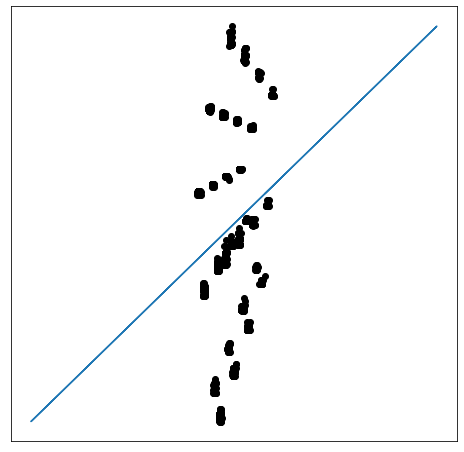

In [20]:
plt.scatter(regr.predict(X_test), y_test, color='black')
plt.plot(y_test,y_test)
plt.xticks(())
plt.yticks(())
plt.show()

(array([  6.,  84., 139.,  74.,  12.,   0.,   0.,  16.,  93., 138.,  58.,
         12.,   0.,   0.,  16., 124., 126.,  47.,  22.,  95.,  86.,  79.,
        117., 115.,  40.,  35., 116.,  68.,  78., 137.,  96.,  31.,  55.,
        108.,  64., 101., 171., 142.,  69.,  77., 115.,  67., 104., 202.,
        129.,  41.,  86.,  96.,  54.,  17.,  45.,  71.,  42., 104., 111.,
         73.,  28.,  63.,  65.,  52., 107., 111.,  48.,  45.,  75.,  51.,
         27.,  17.,  35.,  24.,  40.,  73.,  46.,  17.,  22.,  30.,  15.,
         27.,  44.,  22.,   9.,  23.,  18.,  24.,   9.,   2.,   0.,   6.,
         14.,  27.,  19.,   5.,   4.,   3.,   6.,  26.,  18.,  14.,   5.,
          3.]),
 array([-13.12067832, -13.03246678, -12.94425524, -12.8560437 ,
        -12.76783216, -12.67962062, -12.59140908, -12.50319754,
        -12.414986  , -12.32677446, -12.23856292, -12.15035139,
        -12.06213985, -11.97392831, -11.88571677, -11.79750523,
        -11.70929369, -11.62108215, -11.53287061, -11.44465907

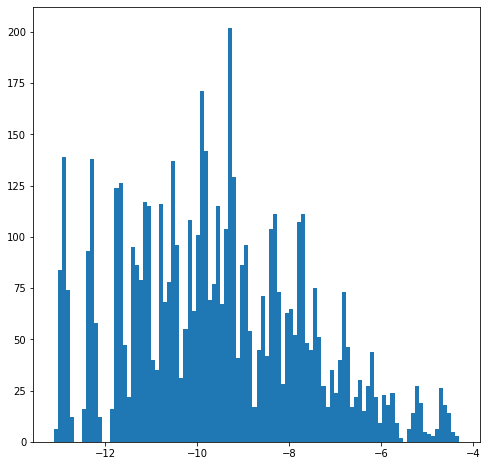

In [25]:
plt.hist(regr.predict(X_train),100)

(array([ 6.,  9., 16., 25., 16.,  9.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  2.,  9., 13., 15., 10.,  8.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1., 17., 13.,
         8.,  6.,  3.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.,  3.,  7.,  2.,  1.,  2.]),
 array([-12.45390537, -12.40387265, -12.35383993, -12.30380721,
        -12.25377448, -12.20374176, -12.15370904, -12.10367632,
        -12.05364359, -12.00361087, -11.95357815, -11.90354543,
        -11.8535127 , -11.80347998, -11.75344726, -11.70341454,
        -11.65338181, -11.60334909, -11.55331637, -11.50328365,
        -11.45325092, -11.4032182 , -11.35318548, -11.30315276,
        -11.25312003, -11.20308731, -11.15305459, 

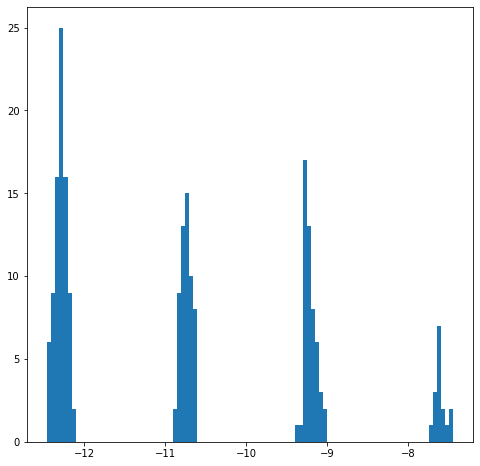

In [30]:
plt.hist(regr.predict(X_test[X_test['Defect Type']==5]),100)

In [34]:
X_test[X_test['Defect Type']==5].index

Int64Index([5607, 5865, 5495, 5172, 5036, 5256, 5716, 5141, 5804, 5014,
            ...
            5410, 5690, 5878, 5827, 5943, 5413, 5563, 5230, 5380, 5645],
           dtype='int64', length=207)

(array([21.,  7.,  0.,  0., 17.,  0., 10.,  5.,  1.,  0., 13.,  3.,  2.,
         1.,  0.,  1.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0., 24.,  1.,  0.,  2., 10.,  0.,  7.,
         2.,  1.,  1.,  4.,  0.,  2.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 35.,
         2.,  0.,  1.,  7.,  0.,  5.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0., 14.,  0.,  0.,  2.]),
 array([-17.2646   , -17.1748204, -17.0850408, -16.9952612, -16.9054816,
        -16.815702 , -16.7259224, -16.6361428, -16.5463632, -16.4565836,
        -16.366804 , -16.2770244, -16.1872448, -16.0974652, -16.0076856,
        -15.917906 , -15.8281264, -15.7383468, -15.6485672, -15.5587876,
        -15.469008 , -15.3792284, -15.2894488, -15.1996692, -15.1098896,
        -15.02011  , -14.9303304, -14.8405508, -14.7507712, -14.66099

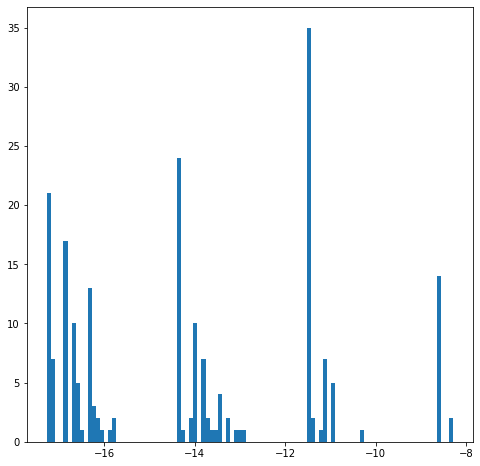

In [37]:
plt.hist(y_test[X_test[X_test['Defect Type']==5].index], 100)

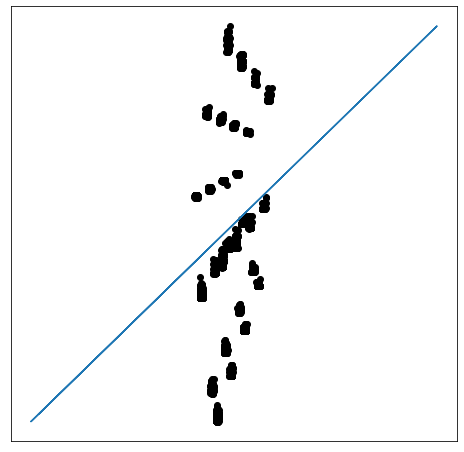

In [21]:
plt.scatter(regr.predict(X_train), y_train, color='black')
plt.plot(y_train,y_train)
plt.xticks(())
plt.yticks(())
plt.show()